In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [19]:
df = pd.read_csv('insurance.csv')
df.info()
df.head()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [11]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Text(0.5, 1.0, 'Effect of Age on Charges')

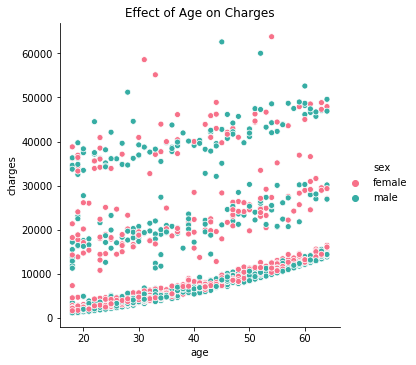

In [15]:
sns.relplot(x='age', y='charges', hue= 'sex', data=df, palette='husl')
plt.title('Effect of Age on Charges')

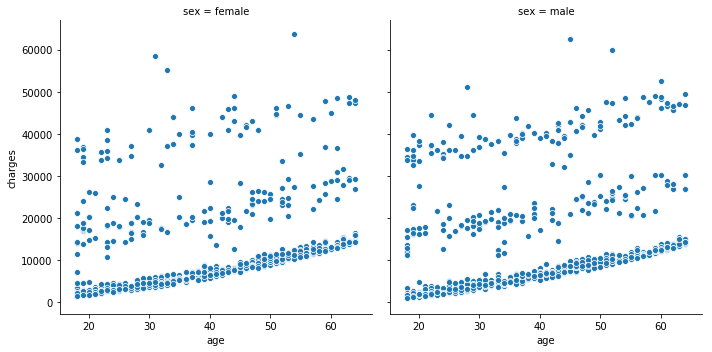

In [14]:
sns.relplot(x='age', y='charges', col='sex',data=df, palette='husl')

Text(0.5, 1.0, 'Combined effect of Age and Smoking on Charges')

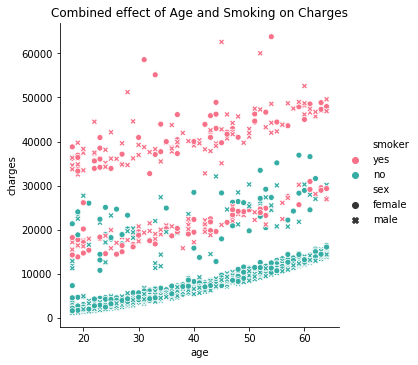

In [17]:
sns.relplot(x='age', y='charges', hue='smoker', style= 'sex', data=df, palette='husl')
plt.title('Combined effect of Age and Smoking on Charges')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


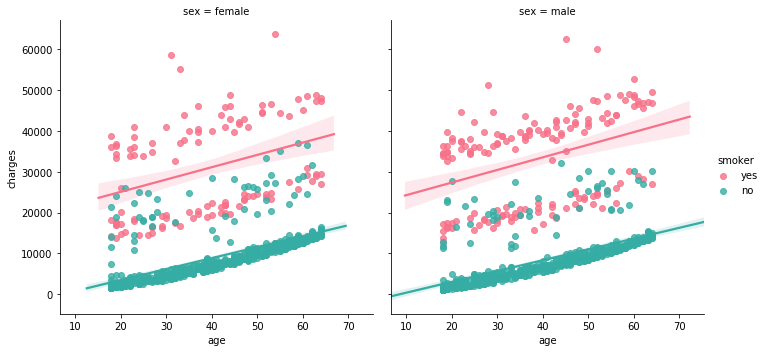

In [18]:
sns.lmplot(x='age', y='charges', hue='smoker', col='sex',data=df, palette='husl')

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df['sex'].drop_duplicates())
df['sex']=encoder.transform(df['sex'])
encoder.fit(df['smoker'].drop_duplicates())
df['smoker']=encoder.transform(df['smoker'])
data1=pd.get_dummies(df['region'], prefix='region')
data= pd.concat([df,data1], axis=1).drop(['region'],axis=1)
print(data.head(2))
print(data.dtypes)

   age  sex    bmi  children  smoker     charges  region_northeast  \
0   19    0  27.90         0       1  16884.9240                 0   
1   18    1  33.77         1       0   1725.5523                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
age                   int64
sex                   int32
bmi                 float64
children              int64
smoker                int32
charges             float64
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y= data['charges']
X = data.drop(['charges'], axis=1)
lin_reg=LinearRegression()
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
lin_reg.fit(train_X,train_y)
pred_y=lin_reg.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE: %f" % (rmse))

RMSE: 6168.155294


In [30]:
X = df["age"] 
y = df["charges"]
X = sm.add_constant(X) 


model1 = sm.OLS(y, X).fit()
predictions = model1.predict(X) 


model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           4.89e-29
Time:                        17:17:14   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
'The above output the is the summary of our model. We see that our dependent variable is charges and
that we used the method of least squares to make the regression line. The R-square is 0.089, meaning
that age explains 8.9% of the variation of charges. We also see that the p-value of the F-stastic is < 0.001
meaning that our model is statistically significant improve than just taking the mean charges.
that when you take the square root of square-R, you also get the correlation coefficient between age and charges.
The coefficient for age is 257.7, this means that with every increase in age (in years) the charges increase with 257.7.
The intercept (see const) is at 3165.9.''

SyntaxError: EOL while scanning string literal (<ipython-input-31-4d8a0ec9ccd0>, line 1)